In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

# Testing Boullanger and Wood, 2022
- The CS6+ Term from ONeill and Mavrogenes (2022) and Boulling and Wood (2022) are not directly comparable.

# Base equations

## O'Neill Equation

$$ [S (ppm)] = C_S^{ONeill}*\textit{f}(SO_{3}) $$

## Wood Equation
- Hugh ONeill suggests the match is better if its log S rather than log SO4

$$ log(C_S^{Wood}) = log([S wt\%]) - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $$

## Reaction and equilibrium constant

$$ SO_3 = 0.5*S_2 + 1.5*O_2 $$

$$ K = \frac{\textit{f}(SO_3)}{\textit{f}(S_2)^{0.5}*\textit{f}(O_2)^{1.5}} $$

## Workthrough to convert one form to another

Apply log to both sides of equilibrium constant

$$ log(K) = log(\frac{\textit{f}(SO_3)}{\textit{f}(S_2)^{0.5}*\textit{f}(O_2)^{1.5}}) $$

Expand:

$$ log(K) = log(\textit{f}(SO_3)) - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $$

Replace the $ - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $ terms in the Wood equation with $ log(K) - log(\textit{f}(SO_3)) $:

$$ log(C_S^{Wood}) = log([S wt\%]) + log(K) - log(\textit{f}(SO_3)) $$

Rearrange:

$$ log(C_S^{Wood}) + log(\textit{f}(SO_3)) = log([S (wt\%)]) + log(k) $$

Remove logs:

$$ C_S^{Wood}*\textit{f}(SO_3) = [S (wt\%)]*K $$

Apply conversion to ppm and rearrange for [S (ppm)]:

$$ [S (ppm)] = \frac{10^4*C_S^{Wood}*\textit{f}(SO_3)}{K} $$

Replace [S (ppm)] with O'Neill equation:

$$ C_S^{ONeill}*\textit{f}(SO_3) = \frac{10^4*C_S^{Wood}*\textit{f}(SO_3)}{K} $$

The $\textit{f}(SO_3)$ term cancels and a natural logarithm is then applied to both sides of the equation. Expanding the resulting equation gives:

$$ ln(C_S^{ONeill}) = ln(10^4) + ln(C_S^{Wood}) - ln(K) $$

Rearrange for $ ln(C_S^{Wood}) $:

$$ ln(C_S^{Wood}) = ln(C_S^{ONeill}) + ln(K) - ln(10^4) $$

Apply an exponential:

$$ C_S^{Wood} = exp(ln(C_S^{ONeill}) + ln(K)) - 10^4 $$

Apply $ log_{10} $ to both sides:

$$ log(C_S^{Wood}) = log(exp(ln(C_S^{ONeill}) + ln(K))) - log(10^4) $$

$$ log(C_S^{Wood}) = (ln(C_S^{ONeill}) + ln(K))*log(e) - log(10^4) $$

Applying the conversion that $ log(e) = 1/ln(10) $:

$$ log(C_S^{Wood}) = \frac{ln(C_S^{ONeill}) + ln(K)}{ln(10)} - log(10^4) $$

## Converting back the other way

Rearranging the equation for $ln(C_S^H)$ from $log(C_S^B)$:

$$ ln(10)*(log(C_S^B) + log(10^4)) - ln(K) = ln(C_S^H) $$

### Lets test this out
- We asked Julien for the major elements they use. 

In [2]:
df_J=ss.import_data('Major_Data_From_Jullien.xlsx', 
                    sheet_name='Feuil1')
df_J.head()

We have replaced all missing liquid oxides and strings with zeros. 


C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,...,LogCs measured,mole Fe3+,mole Fe2+,Fe3+/tot,Fe2+/Fetot,Fe3+/Fe2+,Fe2O3/FeO,FeO mol,FeO mol/T,Log CS single oxygen basis
0,49.1,2.97,16.6,7.63,0.23,4.3,9.8,4.28,1.30,0.0,...,8.958721,0.1120,0.0209,0.842739,0.157261,5.358852,2.679426,0.006255,0.000004,8.893229
1,49.1,0.93,14.4,8.88,0.00,8.5,12.4,2.41,0.00,0.0,...,9.025948,0.1214,0.0241,0.834364,0.165636,5.037344,2.518672,0.007653,0.000005,9.022566
2,43.2,2.93,14.3,8.41,2.51,7.7,14.4,2.58,0.45,0.0,...,9.379698,0.1207,0.0217,0.847612,0.152388,5.562212,2.781106,0.006920,0.000005,9.365970
3,47.2,2.55,12.1,9.30,0.00,10.4,10.7,2.92,0.58,0.0,...,9.176976,0.1273,0.0252,0.834754,0.165246,5.051587,2.525794,0.008159,0.000006,9.046668
4,57.7,1.64,20.7,4.88,0.00,2.0,4.6,6.03,2.62,0.0,...,8.628487,0.0697,0.0136,0.836735,0.163265,5.125000,2.562500,0.003832,0.000003,8.568892


### Now lets calculate using Boulling and Wood

In [3]:
BW_calc=ss.calculate_BW2022_CS6(df=df_J, T_K=df_J['T_K'])
OM_calc=ss.calculate_OM2022_CS6(df=df_J, T_K=df_J['T_K'],
                        Fe3Fet_Liq=0)
OM_calc_celcius=ss.calculate_OM2022_CS6(df=df_J, 
                        T_K=df_J['T_K']-273.15,
                        Fe3Fet_Liq=0)

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\s6_corrections.py:328: RuntimeWarning: divide by zero encountered in log10
  deltaQFM=(4*(np.log10(Fe3Fet_Liq/(1-Fe3Fet_Liq))+1.36-2*liqs['Na_Liq_cat_frac']
g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\s6_corrections.py:328: RuntimeWarning: divide by zero encountered in log10
  deltaQFM=(4*(np.log10(Fe3Fet_Liq/(1-Fe3Fet_Liq))+1.36-2*liqs['Na_Liq_cat_frac']


In [4]:
OM_calc

,LnCS6_calc_OM22_format,LogCS6_calc_BW22_format_SO4,LogCS6_calc_BW22_format,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,...,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,deltaQFM_calc,logfo2_calc,Fe2_Liq_cat_frac
0,13.617551,9.988040,9.562072,49.1,2.97,16.6,7.63,0.23,4.3,9.8,...,0.187503,0.079531,0.015894,0.021411,0.0,0.501141,0.501141,-inf,-inf,0.061154
1,13.499901,9.936946,9.510977,49.1,0.93,14.4,8.88,0.00,8.5,12.4,...,0.161899,0.044575,0.000000,0.006673,0.0,0.630486,0.630486,-inf,-inf,0.070843
2,14.306706,10.287337,9.861368,43.2,2.93,14.3,8.41,2.51,7.7,14.4,...,0.162209,0.048145,0.005525,0.021212,0.0,0.620068,0.620068,-inf,-inf,0.067691
3,13.900422,10.110889,9.684921,47.2,2.55,12.1,9.30,0.00,10.4,10.7,...,0.136432,0.054163,0.007079,0.018350,0.0,0.665929,0.665929,-inf,-inf,0.074407
4,12.859979,9.659031,9.233062,57.7,1.64,20.7,4.88,0.00,2.0,4.6,...,0.221072,0.105943,0.030288,0.011178,0.0,0.422148,0.422148,-inf,-inf,0.036981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,11.254725,6.224151,5.798183,40.3,0.00,11.0,13.83,0.00,15.3,17.2,...,0.120119,0.017246,0.000000,0.000000,0.0,0.663526,0.663526,-inf,-inf,0.107162
78,7.383346,4.542833,4.116864,74.8,0.32,15.1,1.10,0.00,0.3,0.9,...,0.165975,0.063650,0.048781,0.002245,0.0,0.327119,0.327119,-inf,-inf,0.008579
79,10.377385,5.843127,5.417158,48.4,0.00,16.9,0.00,0.00,12.0,22.2,...,0.181083,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,-inf,-inf,0.000000
80,10.152361,5.745400,5.319432,45.6,0.00,19.0,0.00,0.00,17.3,17.7,...,0.198611,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,-inf,-inf,0.000000


## Lets compare our calcs to the spreadsheet
- We expect slight discrepencies, as the spreadsheet they used didnt reference the Na2O column correctly

Text(0.5, 0, 'Boulling and Wood (2022) LogCS6')

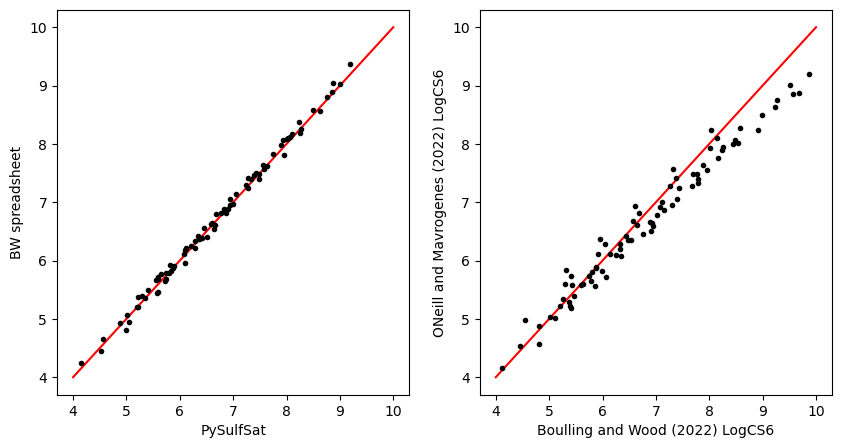

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([4, 10], [4, 10], '-r')
ax1.plot(BW_calc['LogCS6_calc_BW22_format'],
         df_J['Log CS single oxygen basis'], '.k')
ax1.set_ylabel('BW spreadsheet')
ax1.set_xlabel('PySulfSat')
ax2.plot([4, 10], [4, 10], '-r')
ax2.plot(OM_calc['LogCS6_calc_BW22_format'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax2.set_ylabel('ONeill and Mavrogenes (2022) LogCS6')
ax2.set_xlabel('Boulling and Wood (2022) LogCS6')

## What if we do the calcs in celcius for ONeill and MAvrogenes
- Boulling and wood said when they did the comparison, they used celcius insetad of Kevin. 

Text(0.5, 0, 'Boulling and Wood (2022) LogCS6')

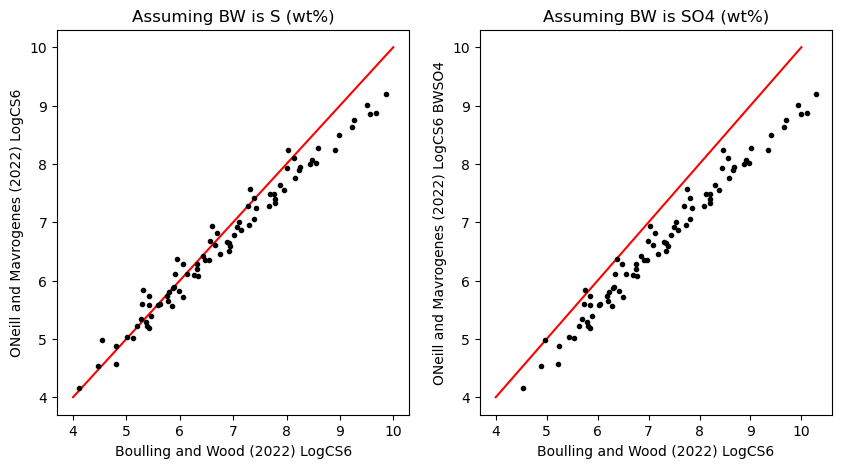

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([4, 10], [4, 10], '-r')
ax1.set_title('Assuming BW is S (wt%)')
ax1.plot(OM_calc['LogCS6_calc_BW22_format'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax1.set_ylabel('ONeill and Mavrogenes (2022) LogCS6')
ax1.set_xlabel('Boulling and Wood (2022) LogCS6')
ax2.set_title('Assuming BW is SO4 (wt%)')
ax2.plot([4, 10], [4, 10], '-r')
ax2.plot(OM_calc['LogCS6_calc_BW22_format_SO4'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax2.set_ylabel('ONeill and Mavrogenes (2022) LogCS6 BWSO4')
ax2.set_xlabel('Boulling and Wood (2022) LogCS6')

## Lets test on the ONeill calibration dataset

## What is boulling and wood is actually SO4 2-

# What if Bernie meant $[SO_4 (wt\%)]$

Starting again at this stage (up to this point the concentration is just treated as a constant - here is where the conversion is necessary):

$$ C_S^B*\textit{f}(SO_3) = [SO_4 (wt\%)]*K $$

Previously, [S] was converted from wt% to ppm by dividing by $10^4$. Conversion from $[SO_4]$ in wt% to $[S]$ in ppm also requires a conversion factor of $\frac{32.065}{96.06} = 0.375$ to be applied:

$$ \frac{C_S^B*\textit{f}(SO_3)}{K} = \frac{[S (ppm)]}{0.375*10^4} $$

Therefore:

$$ \frac{0.375*10^4*C_S^B*\textit{f}(SO_3)}{K} = [S (ppm)] $$

Substituting for $[S (ppm)]$:

$$ \frac{0.375*10^4*C_S^B*\textit{f}(SO_3)}{K} = C_S^H*\textit{f}(SO_3) $$

Cancelling out terms and rearranging gives:

$$ C_S^B = \frac{C_S^H*K}{0.375*10^4} $$

which is equivalent to:

$$ C_S^B = exp(ln(C_S^H) + ln(K)) - 0.375 - 10^4 $$

applying a log conversion:

$$ log(C_S^B) = \frac{ln(C_S^H) + ln(K)}{ln(10)} - log(0.375) - log(10^4) $$

In [4]:
OM_calc_celcius

,LogCS6_calc_BW22_format,LnCS6_calc_OM22_format,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3
0,8.857127,26.736146,49.1,2.97,16.6,7.63,0.23,4.3,9.8,4.28,...,0.001867,0.061154,0.100634,0.187503,0.079531,0.015894,0.021411,0.0,0.501141,0.501141
1,9.005849,27.078592,49.1,0.93,14.4,8.88,0.00,8.5,12.4,2.41,...,0.000000,0.070843,0.126742,0.161899,0.044575,0.000000,0.006673,0.0,0.630486,0.630486
2,9.196739,27.518131,43.2,2.93,14.3,8.41,2.51,7.7,14.4,2.58,...,0.020462,0.067691,0.148497,0.162209,0.048145,0.005525,0.021212,0.0,0.620068,0.620068
3,8.875885,26.779339,47.2,2.55,12.1,9.30,0.00,10.4,10.7,2.92,...,0.000000,0.074407,0.109681,0.136432,0.054163,0.007079,0.018350,0.0,0.665929,0.665929
4,8.628499,26.209712,57.7,1.64,20.7,4.88,0.00,2.0,4.6,6.03,...,0.000000,0.036981,0.044662,0.221072,0.105943,0.030288,0.011178,0.0,0.422148,0.422148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,5.801518,20.143458,40.3,0.00,11.0,13.83,0.00,15.3,17.2,0.96,...,0.000000,0.107162,0.170751,0.120119,0.017246,0.000000,0.000000,0.0,0.663526,0.663526
78,4.156310,16.355226,74.8,0.32,15.1,1.10,0.00,0.3,0.9,3.52,...,0.000000,0.008579,0.008993,0.165975,0.063650,0.048781,0.002245,0.0,0.327119,0.327119
79,5.740296,20.002490,48.4,0.00,16.9,0.00,0.00,12.0,22.2,0.00,...,0.000000,0.000000,0.216252,0.181083,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
80,5.829809,20.208600,45.6,0.00,19.0,0.00,0.00,17.3,17.7,0.00,...,0.000000,0.000000,0.168205,0.198611,0.000000,0.000000,0.000000,0.0,1.000000,1.000000


## Issues from email thread
- First issue is Cell N8 in their spreadsheet doesnt reference the Na2O content, instead has a constant value of 3 wt%. Confirmed that was an error by email
- First value of compositions - Table_3_data after eq. exp, get LogC^s = 9, Hugh Oneill gets 5.9 for log Cs6+
- In their supplement, they show that ONeill and BW2022 give very similar answers, I can only achieve this if I use temperature in celcius in Oneills equations, when it should be Kelvin. 
- Julien emailed back, confirming that they used temperature in celcius for ONeill as the supplement wasn't out yet. So their Cs6 values calculated for Hugh Oneill are wrong.
- Hugh says 'In terms of log CS6+ (in wt% S with fS2 & fO2, so as in their Eqn. 5),
the RMSD for B&W is 0.16, for ON&M is 0.22.
To convert ln CS6+(ON&M Eqn12a) to the log CS6+ used by B&W, see column BD.'

- So basically, the Log Cs6+ from Boulling and wood is not simply the log-ln conversion of Hugh ONeill. 
- Instead, what you have to do, is 
(ONeill lnC6+lnK)/ln10 - log(10,000)


## Equations they are using

Boulling and Wood 2022
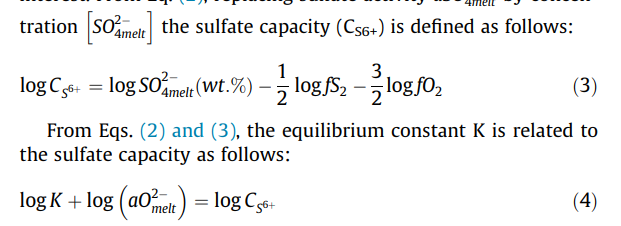

ONeill and Mavrogenes 2022, Where S is in ppm, and fSO3 is in bars
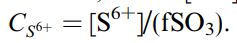



- So boillin and wood use 0.5 log fS2 +1.5 logfo2, 
- Hugh says these are equivalent, because  0.5 S2 + 1.5 O2 = SO3
- Obviously you have to use the appropriate one with the appropriate equation. They are related simply by log K for the gas reaction, the free energy of which we give in our Eqn. 6b
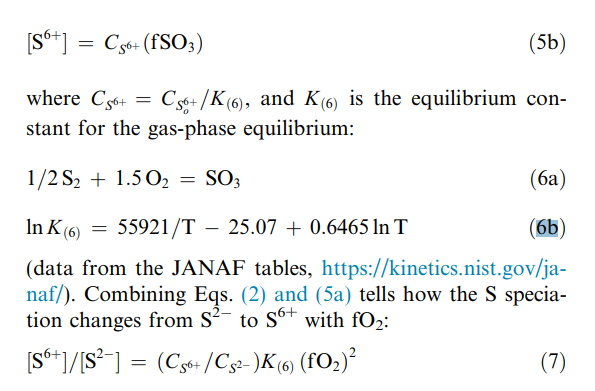


- So hugh converts between his lnC6+, which is on a ppm basis, and that of Boulling and Wood (2022), which is on a wt% basis. That is the log(10,000) term
- You also need a term for lnK, because that relates S2 and 1/2 O2
- And 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

In [ ]:
# This is results from their provided calculator
Liqs_KnowFe=pd.read_excel('Boullanger_Wood_Supp_info.xlsx', 
                        sheet_name="PySulfSat_Input")

In [ ]:
# This is their calibration data. 
Liqs_test=pd.read_excel('Boullanger_Wood_Supp_info.xlsx', 
            sheet_name="TestData")
Liqs_test=Liqs_test.fillna(0)

In [ ]:
test1=ss.calculate_anhydrous_cat_fractions_liquid(liq_comps=Liqs_test)

In [ ]:
test1

In [ ]:
LnCS6_calc=(-8.02+(21100+44000*liqs['Na_Liq_cat_frac']+18700*liqs['Mg_Liq_cat_frac']
+4300*liqs['Al_Liq_cat_frac']+35600*liqs['Ca_Liq_cat_frac']
+44200*liqs['K_Liq_cat_frac']+16500*liqs['Fe2_Liq_cat_frac']+12600*liqs['Mn_Liq_cat_frac'])/T_K)

    
logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)    

## Calculate it for ONeill

In [ ]:
Calc_ONeill_noFe3=ss.calculate_OM2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'],
                                   Fe3Fet_Liq=0)

In [ ]:
Calc_ONeill_10Fe3=ss.calculate_OM2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'],
                                   Fe3Fet_Liq=0.1)

In [ ]:
plt.plot(Calc_ONeill_noFe3['LogCS6_calc'],
         Calc_ONeill_10Fe3['LogCS6_calc'],
         'ok')
plt.plot([2, 8],[2, 8], '-r')

## Check with spreadsheet

In [ ]:
plt.plot(Liqs_test['PW_LogCS6'].loc[Liqs_test['PW_LogCS6']>0],
         Calc_ONeill_noFe3['LogCS6_calc'].loc[Liqs_test['PW_LogCS6']>0], 'or')
plt.plot([4, 7], [4, 7], '-k')

In [ ]:
Calc_BW2022=ss.calculate_BW2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'])

In [ ]:
plt.plot(Calc_BW2022['LogCS6_calc'], 
         Liqs_test['Log Cs'], 'or')
plt.plot([4, 10], [4, 10])


In [ ]:
plt.plot(Calc_ONeill['LogCS6_calc'],
         Calc_BW2022['LogCS6_calc'],
         'ok')
plt.plot([4, 12],[4, 12], '-r')

In [ ]:
calc_ONeillTest=ss.calculate_OM2022_S6St(df=Liqs_test, T_K=Liqs_test['Temparature (K)'],  
                    Fe3Fet_Liq=0.01)

calc_ONeillTest.head()
LogC6_ONeill=np.log10(np.exp(calc_ONeillTest['LnCS2_calc']))

In [ ]:
Liqs_test

In [ ]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=Liqs_KnowFe, T_K=Liqs_KnowFe['Temparature (K)'],  
                    Fe3Fet_Liq=0.3)

calc_GivenFe3.head()

## Boulanger and Wood 2022

In [ ]:
def calc_BW2022_CS6(*, df, T_K):
    """ Calculates logCs6 and Cs6 using the expression of 
    Boulanger and Wood, 2022 """
    
    liqs=df.copy()
    liqs=ss.calculate_anhydrous_cat_fractions_liquid(liq_comps=liqs)
    
    logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)
    

  
    liqs.insert(0, 'LogCS6_calc', logCs6)
    liqs.insert(0, 'LnCS6_calc', np.log(10**logCs6))
    liqs.insert(0, 'CS6_calc', 10**(LnCS6_calc))
    return liqs                

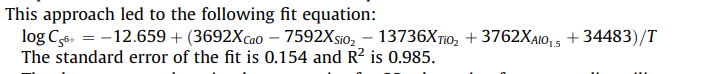

In [ ]:
T_K

In [ ]:
T_K=Liqs_KnowFe['Temparature (K)']
logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)

In [ ]:
logCs6

In [ ]:
plt.plot(np.log10(10**logCs6), np.log10(np.exp(calc_GivenFe3['LnCS6_calc'])), 'ok')
plt.plot([0, 10], [0, 10], '-r')